Q1.  
[10] Eigenfaces 
1. data partition 하기
2. S=(1/N)AAT : train data에 PCA 적용
 including: the eigenvectors, the eigenvalues, and the mean image, how many eigenvectors with non-zero eigenvalues are obtained and how many eigenvectors are to be used for face recognition.
3. S=(1/N)ATA : train data에 PCA 적용, 2와 비교
 including: if the eigenvectors and eigenvalues obtained are identical, what are the pros/cons of each method. (Show respective measurements)

In [8]:
import sys
import os
sys.path.append('../')

from dataset.data import split_data
from question1 import eigen

from scipy import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import time
import tracemalloc
import psutil

In [9]:
def memory_usage(message=''):
    # current process RAM usage
    p = psutil.Process()
    rss = p.memory_info().rss / 2 ** 20 # Bytes to MB
    print(f"[{message}] memory usage: {rss: 10.5f} MB")

In [2]:
# 1. split data using data.py function
train_data, train_label, test_data, test_label = split_data(data_path="../dataset/face.mat")
mean_face = np.mean(train_data, axis=1).reshape(-1, 1)

In [3]:
## 2. S=(1/N)AAT
# (D*N)@(D*N) = D*D
val1, vec1 = eigen.pca(train_data, mean_face, low=False)

## 3. S=(1/N)ATA
# N*N
val2, vec2 = eigen.pca(train_data, mean_face)

 11.25765 sec
 2.07693 sec


Two eigenvalues are identical
Two eigenvectors are identical
2576
416
415
415


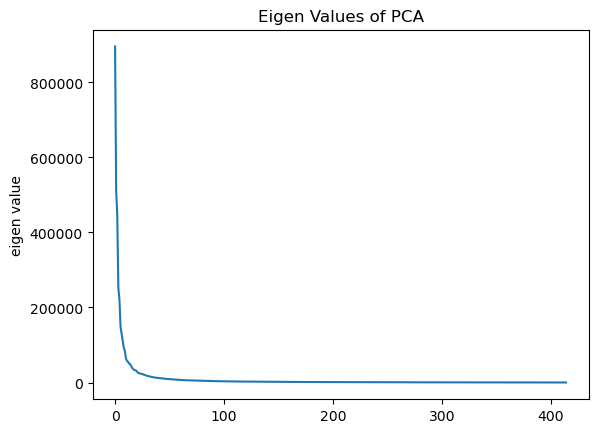

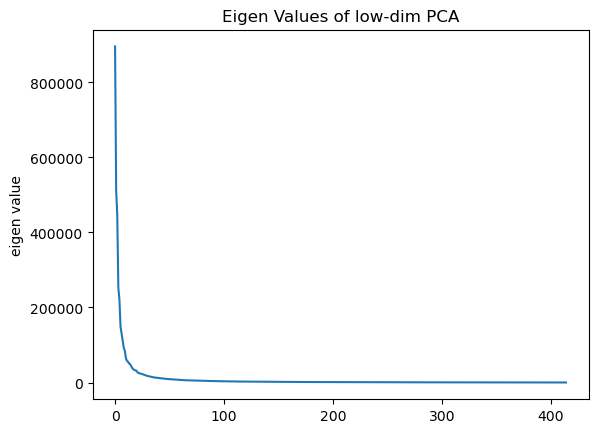

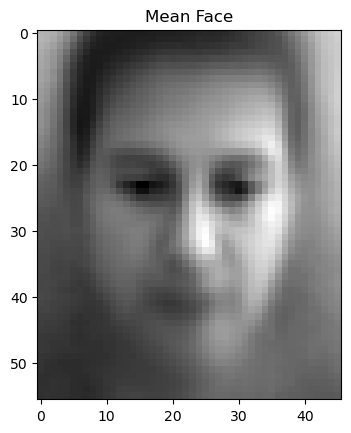

90 percent eigenvalue number:  65
95 percent eigenvalue number:  122
99 percent eigenvalue number:  269


In [14]:
M = 415
if (np.isclose(val1[:M], val2[:M], rtol=1e-5, atol=1e-8).all()):
    print("Two eigenvalues are identical")

if (np.isclose(abs(vec1[:, :M]), abs(vec2[:, :M]), rtol=1e-5, atol=1e-8).all()):
    print("Two eigenvectors are identical")

print(np.count_nonzero(val1))
print(np.count_nonzero(val2))
print(np.sum(val1>1/100))
print(np.sum(val2>1/100))

# # the eigenvectors, the eigenvalues
# eigen.plot_eig_val(val1[:M])
# eigen.plot_eig_val(val2[:M])

A = val1[val1 > 1/100]
num = A.shape[0]
x = np.arange(0,num)
y = A.flatten()

plt.plot(x, y)
plt.ylabel('eigen value')
plt.title('Eigen Values of PCA')
plt.show()

B = val2[val2 > 1/100]
num = B.shape[0]
z = np.arange(0,num)
w = B.flatten()

plt.plot(z, w)
plt.ylabel('eigen value')
plt.title('Eigen Values of low-dim PCA')
plt.show()

# mean image
mean_img = eigen.mean_face_reconstruction(mean_face)

"""
추가할 점: how many eigenvectors with non-zero eigenvalues are 
obtained and how many eigenvectors are to be used for face recognition
"""
eigenval_percent = val2 / np.sum(val2)
cur_percent = 0.0
cnt = 0
for num, i in enumerate(eigenval_percent):
    cur_percent += i
    if (cur_percent > 0.90 and cnt == 0): 
        print("90 percent eigenvalue number: ", num)
        cnt+=1
    if (cur_percent > 0.95 and cnt == 1): 
        print("95 percent eigenvalue number: ", num)
        cnt+=1
    if (cur_percent > 0.99): 
        print("99 percent eigenvalue number: ", num)
        break

[15] Application of Eigenfaces (low PCA)
1. face image reconstruction 
 변수: varying the number of bases 
 including: if the reconstruction error (or the distortion measure) obtained is same as in the theory, how good the reconstruction / results are for at least 3 images of your choice (e.g. from both the training and testing dataset). 
2. PCA-based face recognition 
 변수: 아키텍쳐에서 사용된 parameter를 달리하여 실험할 것
 including: accuracy, example success and failure cases, the confusion matrices, time/memory

Text(0.5, 1.0, 'Test data reconstruction error corresponding to number of bases')

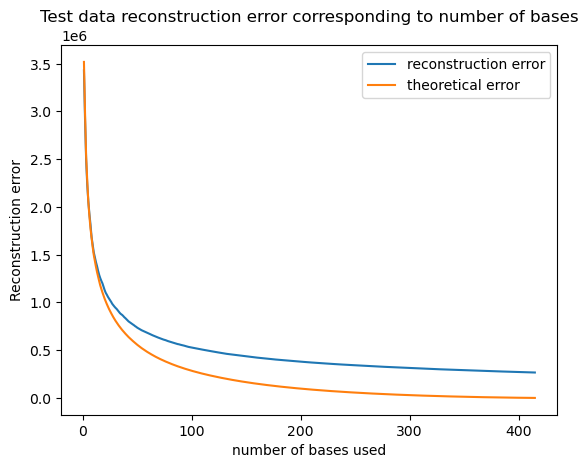

In [13]:
# 1. reconstruction error corresponding to number of bases
# eigenvalue가 작을수록 small detail과 관련이 있어서 test data reconstruction에서 
# error가 커진다 (?)
re_error = []
th_error = []
for i in range (1, 416):
    th, re = eigen.face_reconstruction(test_data, val2, vec2, mean_face, M = i)
    th_error.append(th)
    re_error.append(re)

th_error = np.array(th_error)
re_error = np.array(re_error)

# draw graph
graph = plt.figure()
ax1 = graph.add_subplot(111)
X = np.arange(1, 416)
ax1.plot(X, re_error, label='reconstruction error')
ax1.plot(X, th_error, label='theoretical error')
ax1.set_ylabel('Reconstruction error')
ax1.set_xlabel('number of bases used')

plt.legend()
plt.title('Test data reconstruction error according to the number of bases')

Text(0.5, 1.0, 'Test data reconstruction error corresponding to number of bases')

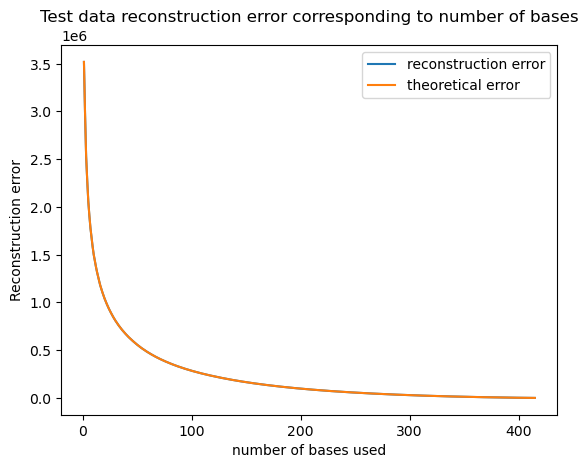

In [15]:
# 위 코드 동일, train data version: theory와 reconstruction error 동일
re_error = []
th_error = []
for i in range (1, 416):
    th, re = eigen.face_reconstruction(train_data, val2, vec2, mean_face, M = i)
    th_error.append(th)
    re_error.append(re)

th_error = np.array(th_error)
re_error = np.array(re_error)

# draw graph
graph = plt.figure()
ax1 = graph.add_subplot(111)
X = np.arange(1, 416)
ax1.plot(X, re_error, label='reconstruction error')
ax1.plot(X, th_error, label='theoretical error')
ax1.set_ylabel('Reconstruction error')
ax1.set_xlabel('number of bases used')

plt.legend()
plt.title('Test data reconstruction error according to the number of PCA bases')

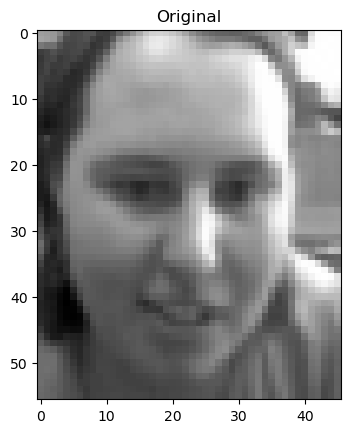

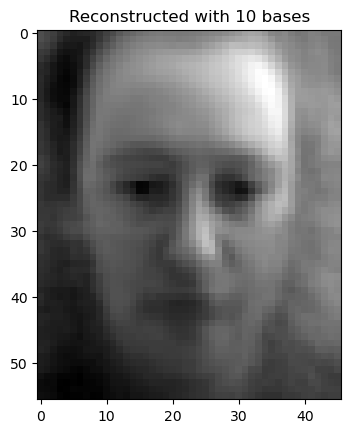

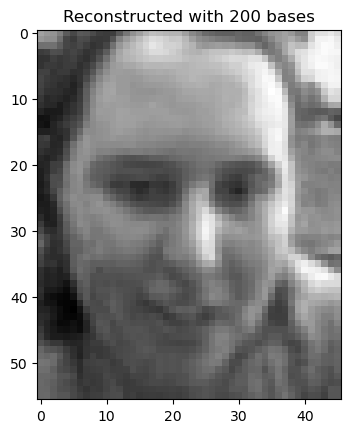

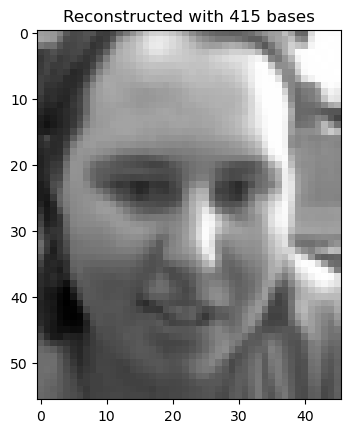

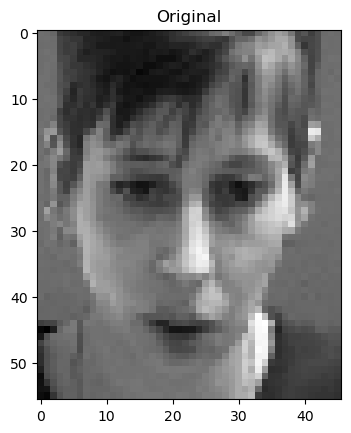

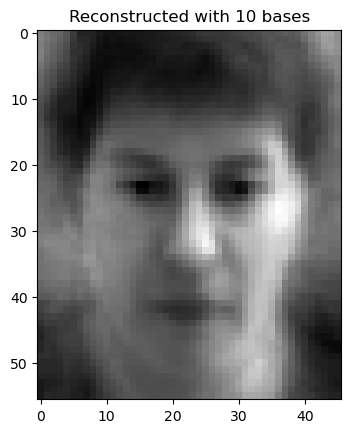

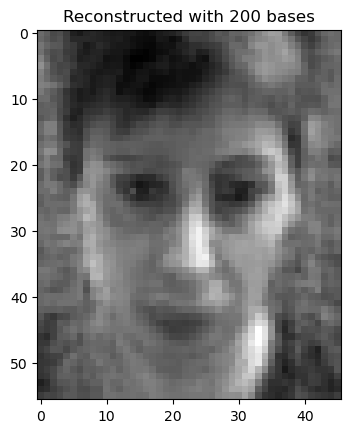

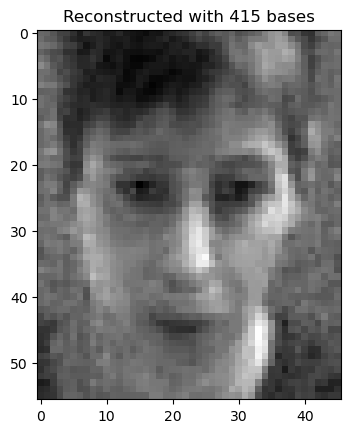

In [6]:
# reconstruction result image: at leat 3 images, from both train & test data
eigen.face_reconstruction(train_data, 100, val2, vec2, mean_face, 10, True, True)
eigen.face_reconstruction(train_data, 100, val2, vec2, mean_face, 200, True)
eigen.face_reconstruction(train_data, 100, val2, vec2, mean_face, 415, True)

eigen.face_reconstruction(test_data, 20, val2, vec2, mean_face, 10, True, True)
eigen.face_reconstruction(test_data, 20, val2, vec2, mean_face, 200, True)
eigen.face_reconstruction(test_data, 20, val2, vec2, mean_face, 415, True)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

def pca_transform (data, eig_val, eig_vec, mean_face, M=50):
    centered_data = data - mean_face
    projected_data = eig_vec[:, :M].T @ centered_data
    return projected_data

In [18]:
##### test #####

train_PCA_data = pca_transform(train_data, val2, vec2, mean_face, M = 100)
test_PCA_data = pca_transform(test_data, val2, vec2, mean_face, M = 100)

model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
model.fit(train_PCA_data.T, train_label)
result = model.score(test_PCA_data.T, test_label)
memory_usage()
print(model.predict(test_PCA_data.T))
print(result)

test_pred = eigen.knn_classifier(train_data, train_label, test_data, k=5, M=100)
accuracy = np.mean(test_pred == test_label)
print(test_pred)
print(accuracy)

[] memory usage:  277.31641 MB
[ 1 16  5  2  3  3  4  4  5  5  6 10  7  7 34  4  9  9 10  1 11 11  6 12
 13 34 16 12 14 15  5  8 29 17  8 18  6 17 18 16 21 16 24 10 41 23  4 24
  1  1 26 26 25 27 28 28 29 29 29 29 31 31 18 31 33 37 35 34 46 35 28 11
 37 37 27 48 14 14 31 35 35 11 26 26 43 14  1 44 32 32 46  1  7 29 36 26
 16 38 37 50 51 25 52 52]
0.4326923076923077
[ 1 16  5  2  3  3  4  4  5  5  6 10  7  7 34  4  9  9 10  1 11 11  6 12
 13 34 16 12 14 15  5  8 29 17  8 18  6 17 18 16 21 16 24 10 41 23  4 24
  1  1 26 26 25 27 28 28 29 29 29 29 31 31 18 31 33 37 35 34 46 35 28 11
 37 37 27 48 14 14 31 35 35 11 26 26 43 14  1 44 32 32 46  1  7 29 36 26
 16 38 37 50 51 25 52 52]
0.4326923076923077


In [16]:
# 2. PCA-KNN classification
max_acc = 0
max_k = 0
max_M = 0

acc_knn = np.zeros((5, 415))
time_knn = np.zeros((5, 415))
memory_knn = np.zeros((5, 415))
for i in range(5):
    for j in range (1, 416):
        tracemalloc.start()
        start = time.time()
        train_PCA_data = pca_transform(train_data, val2, vec2, mean_face, M = j)
        test_PCA_data = pca_transform(test_data, val2, vec2, mean_face, M = j)

        n_neighbors = 2 * i + 1
        model = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
        model.fit(train_PCA_data.T, train_label)
        end = time.time()
        
        result = model.score(test_PCA_data.T, test_label)
        _, peak_memory = tracemalloc.get_traced_memory()
        memory_knn[i][j-1] = peak_memory / (1024 * 1024)  # 메모리를 MB 단위로 변환
        tracemalloc.stop()
        acc_knn[i][j-1] = result
        time_knn[i][j-1] = end-start
    print(n_neighbors,"-nn neighbors batch end")
    
io.savemat('knn-pca.mat', {'accuracy':acc_knn, 'time':time_knn, 'memory':memory_knn})


1 -nn neighbors batch end
3 -nn neighbors batch end
5 -nn neighbors batch end
7 -nn neighbors batch end
9 -nn neighbors batch end


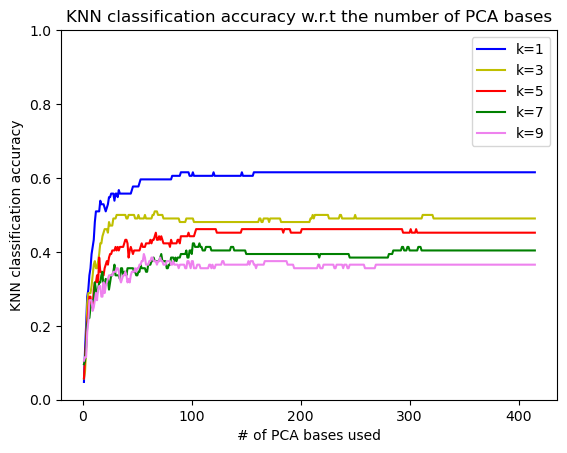

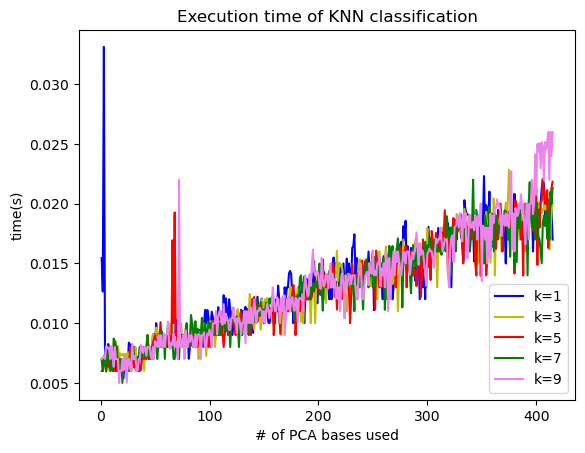

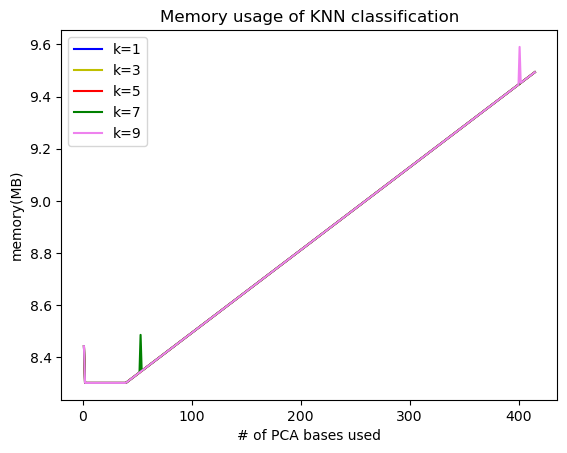

In [12]:
# PCA-KNN accuracy plot
base_dir = os.getcwd()  
full_data_path = os.path.join(base_dir, "./knn-pca.mat")
pca_result = io.loadmat(full_data_path)
knn_acc = np.array(pca_result["accuracy"])
time_acc = np.array(pca_result["time"])
memory_acc = np.array(pca_result["memory"])

# print(knn_acc.shape)

plt.figure()
X = np.arange(1, 416)
plt.ylim([0.0, 1.0])

plt.plot(X, knn_acc[0, :], color='b', label='k=1')
plt.plot(X, knn_acc[1, :], color='y', label='k=3')
plt.plot(X, knn_acc[2, :], color='r', label='k=5')
plt.plot(X, knn_acc[3, :], color='g', label='k=7')
plt.plot(X, knn_acc[4, :], color='violet', label='k=9')
plt.ylabel('KNN classification accuracy')
plt.xlabel('# of PCA bases used')
plt.legend()
plt.title('KNN classification accuracy w.r.t the number of PCA bases')
plt.show()

plt.figure()
Y = np.arange(1, 416)
plt.plot(Y, time_acc[0, :], color='b', label='k=1')
plt.plot(Y, time_acc[1, :], color='y', label='k=3')
plt.plot(Y, time_acc[2, :], color='r', label='k=5')
plt.plot(Y, time_acc[3, :], color='g', label='k=7')
plt.plot(Y, time_acc[4, :], color='violet', label='k=9')
plt.ylabel('time(s)')
plt.xlabel('# of PCA bases used')
plt.legend()
plt.title('Execution time of KNN classification')
plt.show()

plt.figure()
Z = np.arange(1, 416)
plt.plot(Z, memory_acc[0, :], color='b', label='k=1')
plt.plot(Z, memory_acc[1, :], color='y', label='k=3')
plt.plot(Z, memory_acc[2, :], color='r', label='k=5')
plt.plot(Z, memory_acc[3, :], color='g', label='k=7')
plt.plot(Z, memory_acc[4, :], color='violet', label='k=9')
plt.ylabel('memory(MB)')
plt.xlabel('# of PCA bases used')
plt.legend()
plt.title('Memory usage of KNN classification')
plt.show()



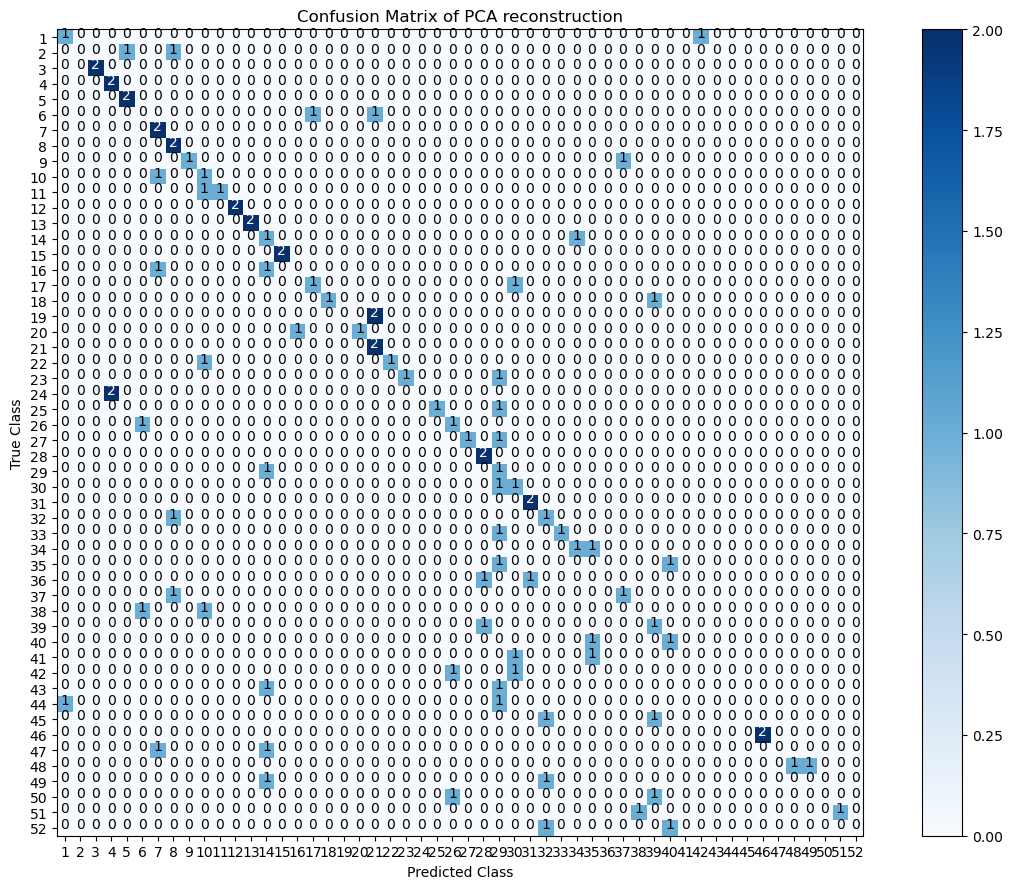

In [11]:
# 2. PCA-KNN classification result using k=5

train_PCA_data = pca_transform(train_data, val2, vec2, mean_face, M = 300)
test_PCA_data = pca_transform(test_data, val2, vec2, mean_face, M = 300)

n_neighbors = 5
model = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
model.fit(train_PCA_data.T, train_label)
result = model.predict(test_PCA_data.T)

    
# confusion matrix
cm = confusion_matrix(test_label, result, labels = np.arange(1, 53))

# visualize cm
plt.figure(figsize=(12, 9))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix of PCA reconstruction')
plt.colorbar()

# set axis label
tick_marks = np.arange(len(np.arange(1, 53)))
plt.xticks(tick_marks, np.arange(1, 53))
plt.yticks(tick_marks, np.arange(1, 53))

# fill each cell
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j], 
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.tight_layout()
plt.show()


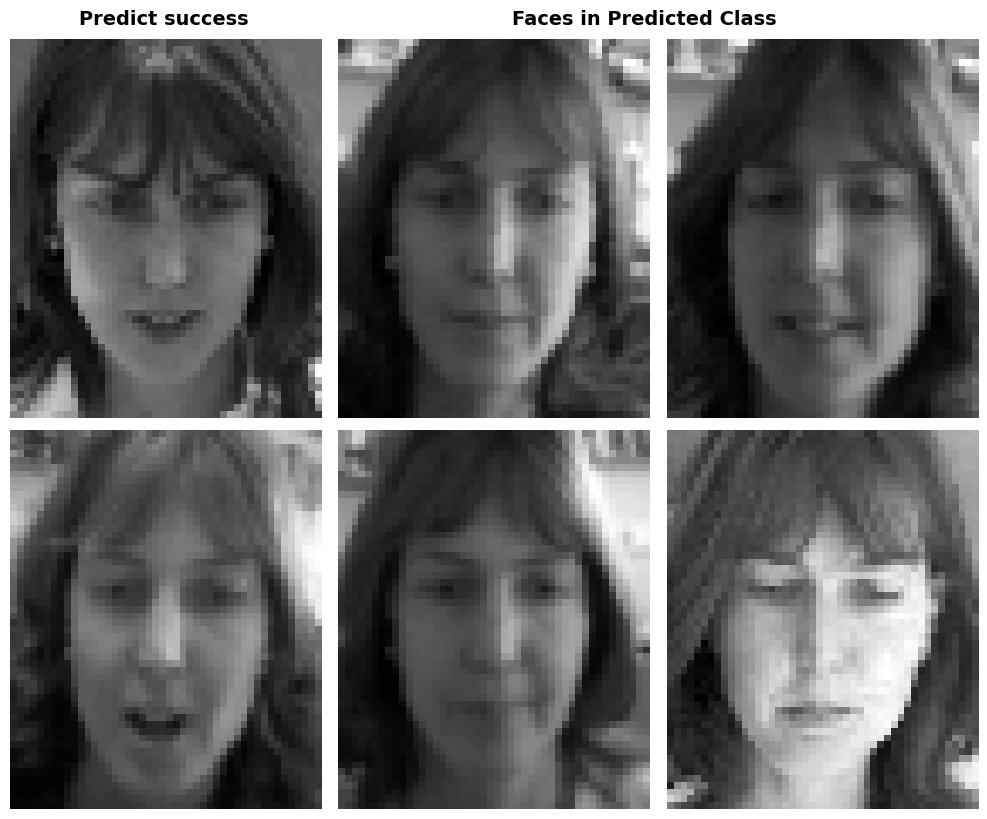

In [ ]:
# success examples

images_success = [test_data.T[4].reshape(46, -1).T, test_data.T[5].reshape(46, -1).T]  # Predict Succeeded Faces (2개)
images_predicted = [train_data.T[17].reshape(46, -1).T, train_data.T[18].reshape(46, -1).T, train_data.T[19].reshape(46, -1).T, train_data.T[20].reshape(46, -1).T]  # Faces in Predicted Class (4개)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))

# faces that fail to predict (class 2)
axes[1, 0].axis('off')  
fig.text(0.17, 1.0, 'Predict success', fontsize=14, fontweight='bold', ha='center')
for i in range(len(images_success)):
    axes[i, 0].imshow(images_success[i], cmap='gray')
    axes[i, 0].axis('off')  

# Faces in predicted class
axes[1, 0].axis('off')  
fig.text(0.65, 1.0, 'Faces in Predicted Class', fontsize=14, fontweight='bold', ha='center')
for i in range(len(images_predicted)):
    axes[i % 2, i // 2 + 1].imshow(images_predicted[i], cmap='gray')
    axes[i % 2, i // 2 + 1].axis('off')

plt.tight_layout()
plt.show()

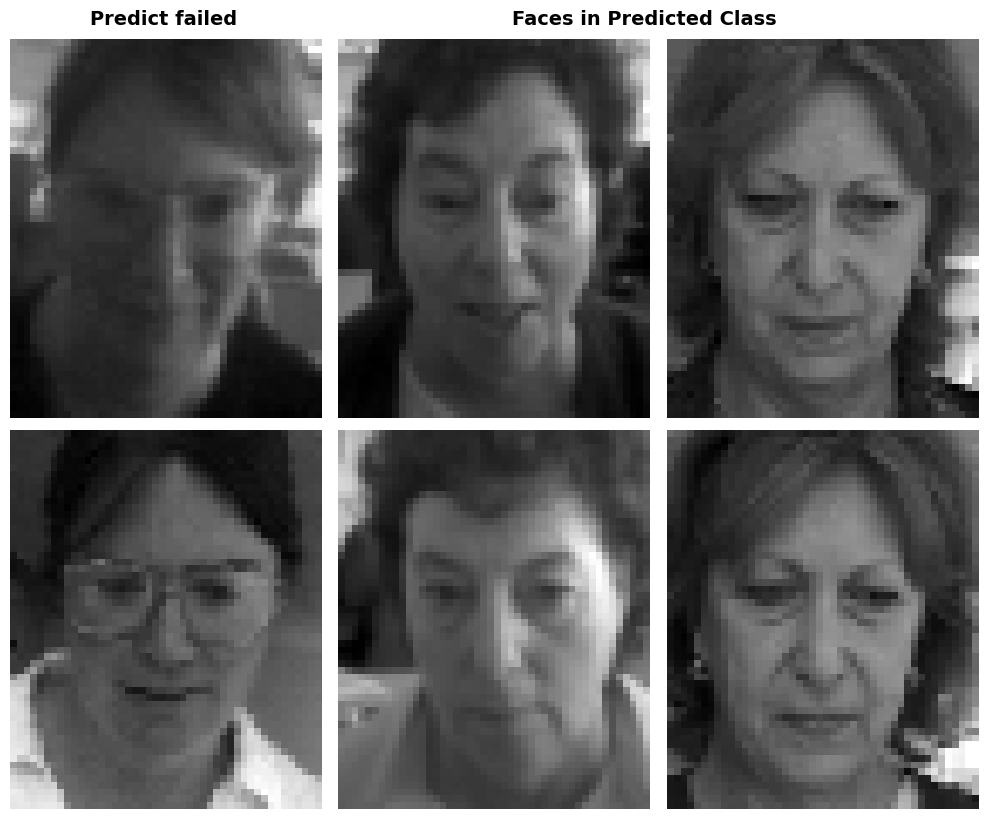

In [6]:
# failure examples

images_success = [test_data.T[30].reshape(46, -1).T, test_data.T[31].reshape(46, -1).T]  # Predict failed Faces (2개) 16
images_predicted = [train_data.T[42].reshape(46, -1).T, train_data.T[44].reshape(46, -1).T, train_data.T[108].reshape(46, -1).T, train_data.T[110].reshape(46, -1).T]  # Faces in Predicted Class (4개) 7, 14

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))

# faces that fail to predict (class 1)
axes[1, 0].axis('off')  
fig.text(0.17, 1.0, 'Predict failed', fontsize=14, fontweight='bold', ha='center')
for i in range(len(images_success)):
    axes[i, 0].imshow(images_success[i], cmap='gray')
    axes[i, 0].axis('off')  

# Faces in predicted class (class 7, 16)
axes[1, 0].axis('off')  
fig.text(0.65, 1.0, 'Faces in Predicted Class', fontsize=14, fontweight='bold', ha='center')
for i in range(len(images_predicted)):
    axes[i % 2, i // 2 + 1].imshow(images_predicted[i], cmap='gray')
    axes[i % 2, i // 2 + 1].axis('off')

plt.tight_layout()
plt.show()

In [32]:
# PCA-KNN accuracy plot
"""
90 percent eigenvalue number:  65
95 percent eigenvalue number:  122
99 percent eigenvalue number:  269
"""
pca_num = [5, 10, 20, 30, 60, 120, 180, 240, 300]
acc_knn = np.zeros((len(pca_num), 70))
for i in range(len(pca_num)):
    train_PCA_data = eigen.pca_transform(train_data, val2, vec2, mean_face, M = pca_num[i])
    test_PCA_data = eigen.pca_transform(test_data, val2, vec2, mean_face, M = pca_num[i])
    for j in range (0, 70):
        n_neighbors = 2 * j + 1
        model = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
        model.fit(train_PCA_data.T, train_label)
        result = model.score(test_PCA_data.T, test_label)
        acc_knn[i][j] = result
    print(pca_num[i],"-number of eigenval end")
    
io.savemat('knn-pca2.mat', {'accuracy':acc_knn})

5 -number of eigenval end
10 -number of eigenval end
20 -number of eigenval end
30 -number of eigenval end
60 -number of eigenval end
120 -number of eigenval end
180 -number of eigenval end
240 -number of eigenval end
300 -number of eigenval end


(9, 70)


Text(0.5, 1.0, 'KNN classification accuracy w.r.t the number of NN neighbors')

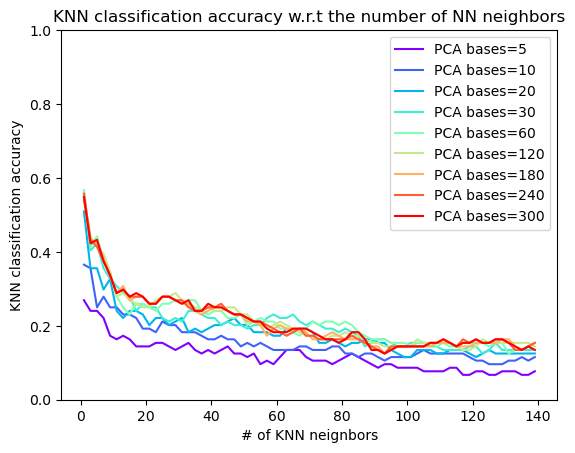

In [33]:
# PCA-KNN accuracy plot
base_dir = os.getcwd()  
full_data_path = os.path.join(base_dir, "./knn-pca2.mat")
knn_acc = io.loadmat(full_data_path)
knn_acc = np.array(knn_acc["accuracy"])

print(knn_acc.shape)
graph = plt.figure()
ax1 = graph.add_subplot(111)
ax1.set_ylim([0.0, 1.0])
X = np.arange(1, 141, 2)

color = plt.cm.rainbow(np.linspace(0, 1, len(pca_num)))
for i, c in enumerate (color):
    ax1.plot(X, knn_acc[i, :], color=c, label='PCA bases={}'.format(pca_num[i]))

ax1.set_ylabel('KNN classification accuracy')
ax1.set_xlabel('# of KNN neignbors')

plt.legend()
plt.title('KNN classification accuracy w.r.t the number of NN neighbors')